In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Machine Learning in Cybersecurity
<p>
Professor : Shanchieh Yang<br>
Student : Vazgen Tadevosyan <br></p>




Data:CSE-CIC-IDS2018 on AWS<br>
To download this dataset you need to:<br>
- install [AWS CLI](https://aws.amazon.com/cli/), available on Mac, Windows and Linux
- As the full data is more than 200gb you might need sample from it.Run aws s3 ls --no-sign-request "s3://cse-cic-ids2018" --recursive --human-readable --summarize". 
-aws s3 ls --no-sign-request "s3://cse-cic-ids2018" --recursive --human-readable --summarize. Choose one of the files and location where to download , and run the command below
-aws s3 cp --no-sign-request "chosen data" path



The final dataset includes seven different attack scenarios: Brute-force, Heartbleed, Botnet, DoS, DDoS, Web attacks, and infiltration of the network from inside. The attacking infrastructure includes 50 machines and the victim organization has 5 departments and includes 420 machines and 30 servers. The dataset includes the captures network traffic and system logs of each machine, along with 80 features

<h1> Getting the Data </h1>


1. [Imports](#1)
2. [Getting Data](#2)
3. [Dropping redundant columns and saving new data](#3)
4. [EDA](#4)
 - [Pie Chart](#4)
 - [Barplot](#5)
 - [Histogram](#6) 


<h3>Imports</h3> <a name="1"></a>

In [6]:
#for not showing warnings
import os
import time
import glob
import warnings
warnings.filterwarnings('ignore')
#data manipulation and visualization libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#in case of error run <<!pip install 'missing library'>> and run the code again

<h3>Getting data</h3> <a name="2"></a>

In [7]:
def combining_datasets():
  """The funcion subsets IDS 2018 data for each 
  day and then combine the into one csv file"""
  path = '/content/drive/MyDrive/RIT/CyberSecurity/Data_CIS_2018'
  filenames = glob.glob(path + "/*.csv")
  def get_data_sample(file):
    chunksize = 10 ** 6
    lst_of_dataframes = [chunk.sample(n=10000) for chunk in pd.read_csv(file, chunksize=chunksize)]
    data = pd.concat(lst_of_dataframes, ignore_index=True)
    return data
  dataset = pd.concat([get_data_sample(file) for file in filenames],ignore_index=True)
  return dataset  
dataset = combining_datasets()


<h3>Dropping columns and saving the data</h3> <a name="3"></a>

In [9]:
dataset.drop(columns=['Flow ID','Src IP','Src Port','Dst IP',"Protocol","Dst Port","Timestamp"],inplace=True)##Those features are not descriptive and they are redundant
dataset.dropna(inplace=True)
numeric_columns = dataset.columns[~dataset.columns.isin(["Label","Timestamp"])]
dataset[numeric_columns] = dataset.loc[:,~dataset.columns.isin(["Label"])].apply(lambda x:pd.to_numeric(x,errors="coerce"))
dataset.dropna(inplace=True)
dataset.reset_index(drop=True,inplace=True)
dataset.to_csv('/content/drive/MyDrive/RIT/CyberSecurity/IDS2018.csv', index=False)


In [13]:
print(dataset.shape)

(239237, 77)


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239237 entries, 0 to 239236
Data columns (total 77 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow Duration      239237 non-null  float64
 1   Tot Fwd Pkts       239237 non-null  float64
 2   Tot Bwd Pkts       239237 non-null  float64
 3   TotLen Fwd Pkts    239237 non-null  float64
 4   TotLen Bwd Pkts    239237 non-null  float64
 5   Fwd Pkt Len Max    239237 non-null  float64
 6   Fwd Pkt Len Min    239237 non-null  float64
 7   Fwd Pkt Len Mean   239237 non-null  float64
 8   Fwd Pkt Len Std    239237 non-null  float64
 9   Bwd Pkt Len Max    239237 non-null  float64
 10  Bwd Pkt Len Min    239237 non-null  float64
 11  Bwd Pkt Len Mean   239237 non-null  float64
 12  Bwd Pkt Len Std    239237 non-null  float64
 13  Flow Byts/s        239237 non-null  float64
 14  Flow Pkts/s        239237 non-null  float64
 15  Flow IAT Mean      239237 non-null  float64
 16  Fl

In [ ]:
#reading already combined data

dataset.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,...,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Flow ID,Src IP,Src Port,Dst IP
0,7704,6,02/03/2018 02:21:29,145,2,0,0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,13793.10345,145.0,0.0,145.0,145.0,145.0,145.0,0.0,145.0,145.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,40,0,13793.10345,0.0,...,0.0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,2,0,0,0,259,-1,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,NaN,NaN,NaN,NaN
1,8080,6,02/03/2018 11:39:17,450,2,0,0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,4444.444444,450.0,0.0,450.0,450.0,450.0,450.0,0.0,450.0,450.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,40,0,4444.444444,0.0,...,0.0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,2,0,0,0,2052,-1,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bot,NaN,NaN,NaN,NaN
2,53,17,02/03/2018 02:49:14,440,1,1,36,68.0,36,36,36.0,0.0,68,68,68.0,0.0,236363.6364,4545.454545,440.0,0.0,440.0,440.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,8,8,2272.727273,2272.727273,...,341.333333,0,0,0,0,0,0,0,0,1,70.0,36.0,68.0,0,0,0,0,0,0,1,36,1,68,-1,-1,0,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,NaN,NaN,NaN,NaN
3,8080,6,02/03/2018 10:51:13,9975,3,4,326,129.0,326,0,108.666667,188.216188,112,0,32.25,53.767245,45614.03509,701.754386,1662.5,3642.338411,9088.0,2.0,473.0,236.5,259.508189,420.0,53.0,9586.0,3195.333333,5109.173058,9088.0,2.0,0,0,0,0,72,92,300.75188,401.002506,...,13318.69643,0,0,1,1,0,0,0,1,1,65.0,108.666667,32.25,0,0,0,0,0,0,3,326,4,129,8192,219,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bot,NaN,NaN,NaN,NaN
4,8080,6,02/03/2018 10:22:38,11244,3,4,326,129.0,326,0,108.666667,188.216188,112,0,32.25,53.767245,40466.02633,622.554251,1874.0,4201.142654,10442.0,1.0,540.0,270.0,294.156421,478.0,62.0,10784.0,3594.666667,5932.400891,10442.0,1.0,0,0,0,0,72,92,266.808965,355.745286,...,13318.69643,0,0,1,1,0,0,0,1,1,65.0,108.666667,32.25,0,0,0,0,0,0,3,326,4,129,8192,219,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bot,NaN,NaN,NaN,NaN


<h1>Explanatory Data Analysis</h1><a name='3'></a>
<h3>Pie Chart</h3> <a name="4"></a>

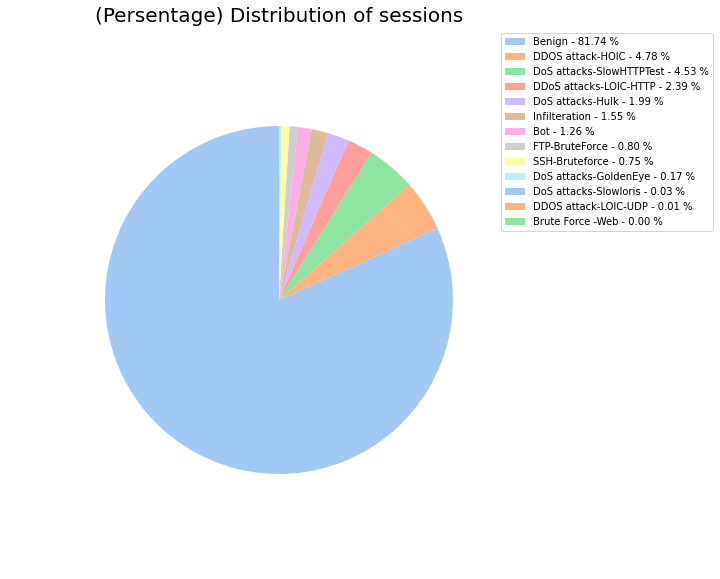

In [ ]:
plt.figure(figsize=(13,10))
colors = sns.color_palette('pastel')[0:10]
x =  dataset['Label'].value_counts().index
y = np.array(dataset['Label'].value_counts().tolist())
#create pie chart
porcent = 100.*y/y.sum()
patches, texts = plt.pie(y, colors=colors, startangle=90, radius=0.8)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]
sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))
plt.legend(patches, labels, loc='left center', bbox_to_anchor=(0.9, 1.),
           fontsize=10)
# plt.pie(values, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("(Persentage) Distribution of sessions",fontsize=20)
plt.show()

<h3>Barplot</h3> <a name="5"></a>

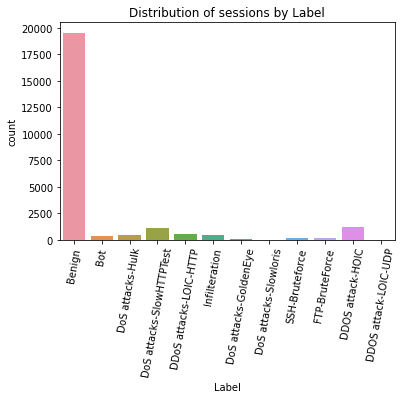

Benign                      81.462500
DDOS attack-HOIC             4.887500
DoS attacks-SlowHTTPTest     4.575000
DDoS attacks-LOIC-HTTP       2.350000
DoS attacks-Hulk             1.950000
Infilteration                1.650000
Bot                          1.304167
SSH-Bruteforce               0.800000
FTP-BruteForce               0.783333
DoS attacks-GoldenEye        0.187500
DoS attacks-Slowloris        0.045833
DDOS attack-LOIC-UDP         0.004167
Name: Label, dtype: float64

In [ ]:
sns.countplot(x="Label",data=dataset)
plt.title(f"Distribution of sessions by Label")
plt.xticks(rotation = 80)
plt.show()
dataset['Label'].value_counts()/len(dataset)*100
#percentage of each Label class

<h3>Histogram</h3><a name="6"></a>

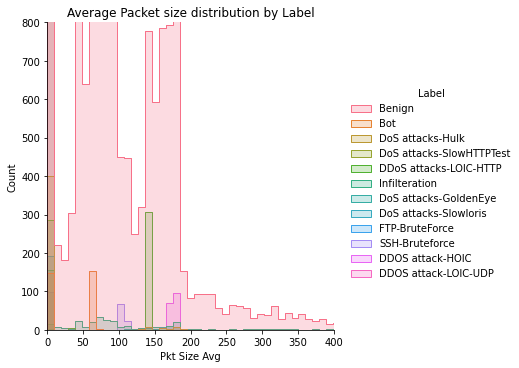

In [ ]:

sns.displot(dataset, x="Pkt Size Avg", hue="Label", element="step")
plt.title("Average Packet size distribution by Label")
  
plt.ylim(0, 800)
plt.xlim(0,400)
plt.show()

<p>From the plot it is seen that Dos Attacks that use Slowloris, Slowhttptest tend to have more packets per second than others.</p>

In [10]:
dataset.describe()## descriptive statistics, as you see we have very large numbers, the problem will be addressed in preprocessing Notebook

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.392370e+05,239237.000000,239237.000000,2.392370e+05,2.392370e+05,239237.000000,239237.000000,239237.000000,239237.000000,239237.000000,...,239237.000000,239237.000000,2.392370e+05,2.392370e+05,2.392370e+05,2.392370e+05,2.392370e+05,2.392370e+05,2.392370e+05,2.392370e+05
mean,1.249284e+07,23.866070,6.823689,9.507523e+02,5.609021e+03,198.963889,10.720336,49.104684,69.747896,331.057817,...,19.895476,18.512755,1.453341e+05,6.844031e+04,2.191718e+05,1.003158e+05,5.479891e+06,1.419844e+05,5.601690e+06,5.345341e+06
std,3.122430e+07,1507.743869,300.363321,4.814755e+04,3.983719e+05,304.585290,24.486757,60.828235,117.297361,488.917973,...,1501.836240,8.322529,2.212955e+06,1.290217e+06,2.883470e+06,1.887099e+06,1.786685e+07,1.617765e+06,1.807572e+07,1.776848e+07
min,0.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.880000e+02,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,8.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.575800e+04,2.000000,1.000000,4.200000e+01,9.000000e+01,40.000000,0.000000,35.000000,0.000000,79.000000,...,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.871224e+06,5.000000,4.000000,4.550000e+02,4.880000e+02,269.000000,22.000000,64.307692,92.953393,372.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.200000e+08,162584.000000,123118.000000,5.202688e+06,1.563604e+08,1460.000000,1460.000000,1460.000000,842.931393,1935.000000,...,162583.000000,44.000000,1.111430e+08,5.777753e+07,1.111430e+08,1.111430e+08,1.199682e+08,5.469683e+07,1.199682e+08,1.199682e+08
